## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [ ]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3 + np.random.normal(0, noise_std, num_samples)
    return X, y

In [ ]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [ ]:
from sklearn.model_selection import train_test_split

degree = 5

# Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.333)

# Generate out-of-range testing set
X_test_out_of_range = np.linspace(5, 7, len(X_test_in_range))
y_test_out_of_range = 0.1 * X_test_out_of_range**5 + X_test_out_of_range**4 - 2 * X_test_out_of_range**3 + 7 * X_test_out_of_range**2 - 9 * X_test_out_of_range + 3


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())])


    model.fit(X.reshape(-1, 1), y)
    return model

In [ ]:
models = {}
# Train polynomial regression models with different degrees
for d in range(2, 8):
    models[d] = train_polynomial_regression(X_train, y_train, degree=d)
    print(models[d])

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('poly_features', PolynomialFeatures(degree=5)),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('poly_features', PolynomialFeatures(degree=6)),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('poly_features', PolynomialFeatures(degree=7)),
                ('linear_regression', LinearRegression())])


## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [ ]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)


## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


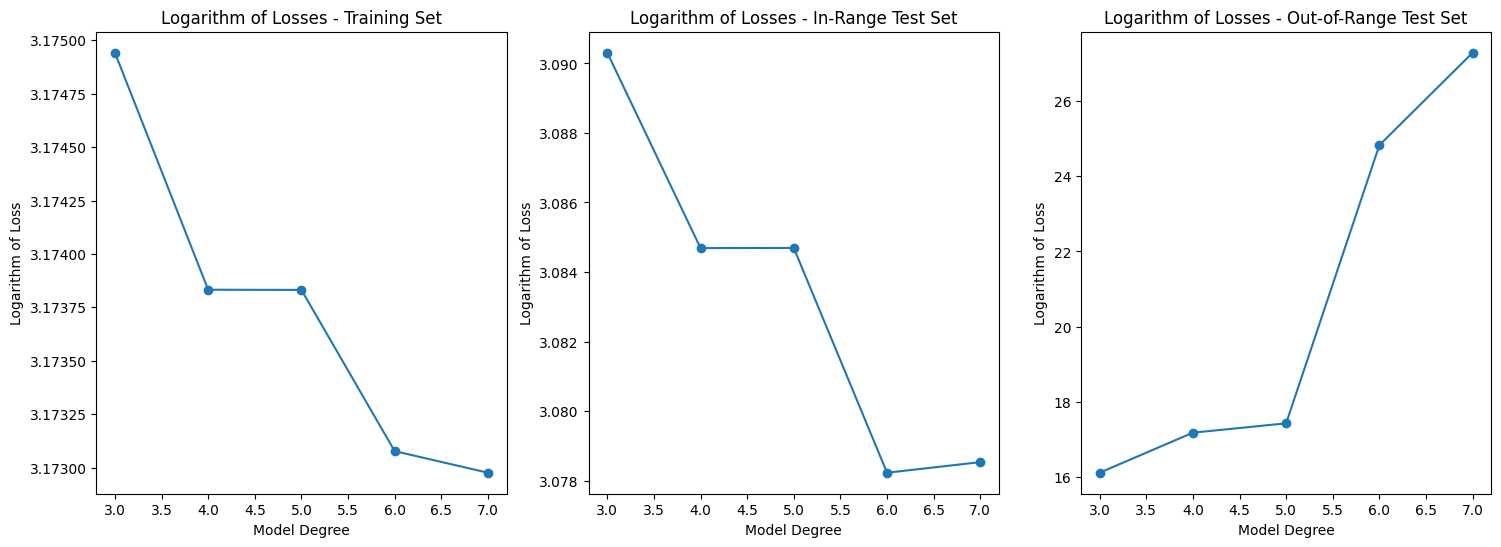

In [ ]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
ax1.plot(range(3, 8), np.log([losses_train[degree] for degree in range(3, 8)]), marker='o')
ax1.set_title('Logarithm of Losses - Training Set')
ax1.set_xlabel('Model Degree')
ax1.set_ylabel('Logarithm of Loss')

# TODO: Plot logarithm of losses of in-range test set
ax2.plot(range(3, 8), np.log([losses_in_range[degree] for degree in range(3, 8)]), marker='o')
ax2.set_title('Logarithm of Losses - In-Range Test Set')
ax2.set_xlabel('Model Degree')
ax2.set_ylabel('Logarithm of Loss')

# TODO: Plot logarithm of losses of out-of-range test set
ax3.plot(range(3, 8), np.log([losses_out_of_range[degree] for degree in range(3, 8)]), marker='o')
ax3.set_title('Logarithm of Losses - Out-of-Range Test Set')
ax3.set_xlabel('Model Degree')
ax3.set_ylabel('Logarithm of Loss')

plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here.

In [ ]:
# TODO: print each model loss on the training and the two test sets

print("Losses on Training Set:")
for degree, loss in losses_train.items():
    print(f"Degree {degree}: {loss}")



print("\nLosses on In-Range Test Set:")
for degree, loss in losses_in_range.items():
    print(f"Degree {degree}: {loss}")

print("\nLosses on Out-of-Range Test Set:")
for degree, loss in losses_out_of_range.items():
    print(f"Degree {degree}: {loss}")


Losses on Training Set:
Degree 2: 31.20091246042523
Degree 3: 23.925433811121543
Degree 4: 23.898902335158642
Degree 5: 23.898882366743976
Degree 6: 23.88085158199753
Degree 7: 23.878436673736196

Losses on In-Range Test Set:
Degree 2: 28.225054425600597
Degree 3: 21.983841598924222
Degree 4: 21.860647989252517
Degree 5: 21.86074440793003
Degree 6: 21.719865827331
Degree 7: 21.72648269245027

Losses on Out-of-Range Test Set:
Degree 2: 265248.6799834581
Degree 3: 10001364.126775214
Degree 4: 28999969.54205203
Degree 5: 37177599.837062895
Degree 6: 60542090388.09375
Degree 7: 706215777580.0363


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.

با افزایش درجه و در نتیجه پیچیده تر شدن مدل، مدل تا حد زیادی روی داده آموزش فیت میشود و در واقع افزایش واریانس داریم در حالی که روی داده های تست و به خصوص در خارج از محدوده میزان خطا بسیار بیشتر است به این دلیل که بیش از اندازه به داده آموزش نزدیک شده ایم.
حال اگر درجه های کمتر را در نظر بگیریم مدل ساده تری داریم که قدرت تعمیم پذیری بیشتری دارد.

